In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#1. Определите количетсво мужчин и женщин, которые ехали на корабле.

In [ ]:
totalCount = len(df)
maleCount = len(df[df.Sex == 'male'])
femaleCount = len(df[df.Sex == 'female'])
print("Всего:", totalCount, " Мужчин:", maleCount, " Женщин:", femaleCount)

Всего: 891  Мужчин: 577  Женщин: 314


#2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров


In [ ]:
survivedCount = len(df[df.Survived == 1])
ratio = survivedCount / totalCount
print("Доля выживших: ",ratio)

Доля выживших:  0.3838383838383838


#3.Какую долю пассажиры первого класса составляли среди всех пассажиров

In [ ]:
firstClassCount = len(df[df.Pclass == 1])
firstClassRatio = firstClassCount / totalCount
print("Доля пассажиров первого класса:", firstClassRatio)

Доля пассажиров первого класса: 0.24242424242424243


#4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров

In [ ]:
ageMean = df.Age.mean()
ageMedian = df.Age.median()
print("Средний возраст:", ageMean, "Медиана возраста:", ageMedian)

Средний возраст: 29.69911764705882 Медиана возраста: 28.0


#5.Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.

In [ ]:
sibSp = df.SibSp
parch = df.Parch
corr = sibSp.corr(parch, method="pearson")
print("Корреляция:", corr)

Корреляция: 0.41483769862015557


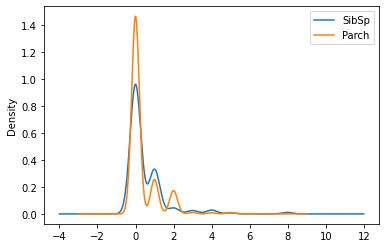

In [ ]:
sibSp.plot.kde(legend=True)
parch.plot.kde(legend=True)

#6.Какое самое популярное женское имя на корабле?


In [ ]:
def getFirstName(name) :
  return name.split("." if name.find("(") == -1 else "(")[1].split()[0]

names = df.Name[df.Sex == 'female']
names = names.apply(getFirstName)
names.value_counts().head()

Anna         14
Mary         13
Elizabeth    11
Margaret     10
Alice         6
Name: Name, dtype: int64

#7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [ ]:
corr = df.Survived.corr(df.Pclass, method="pearson")
print("Корреляция:", corr)

Корреляция: -0.3384810359610148


#8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

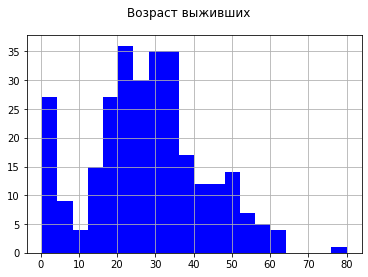

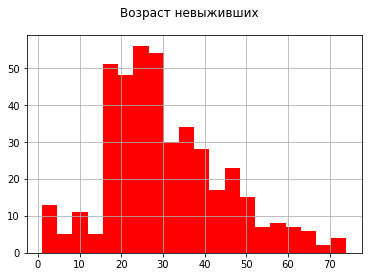

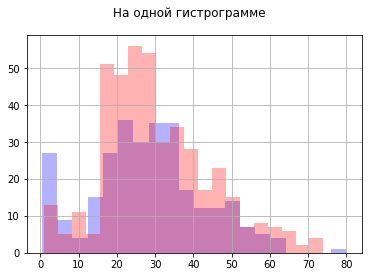

In [ ]:
import matplotlib.pyplot as plt
import pylab as pl

binsCount = 20
survivedAge = df[df.Survived == 1]["Age"]
notSurvivedAge = df[df.Survived == 0]["Age"]

plt.figure();
pl.suptitle("Возраст выживших")
survivedAge.hist(bins=binsCount, color="b")

plt.figure();
pl.suptitle("Возраст не выживших")
notSurvivedAge.hist(bins=binsCount, color="r")

plt.figure();
pl.suptitle("На одной гистрограмме")
survivedAge.hist(bins=binsCount, alpha=0.3, color="b")
notSurvivedAge.hist(bins=binsCount, alpha=0.3, color="r")
plt.show()

##Вывод

*   Наибольшее количество выживших пассажиров в возрасте от 20 до 25 лет
*   Наибольшее количество не выживших пассажиров в возрасте от 25 до 30 лет




#9.Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

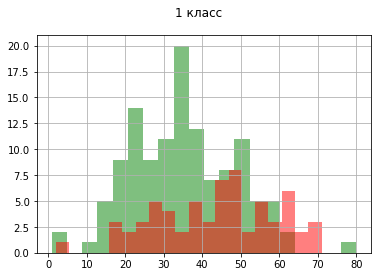

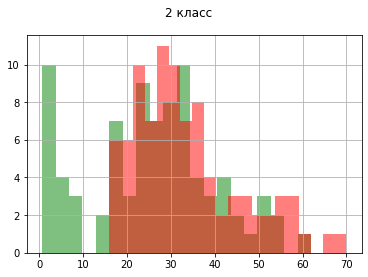

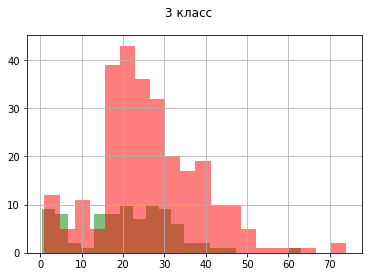

In [ ]:
survivedPeople = [df[(df.Survived == 1) & (df.Pclass == 1)]["Age"], df[(df.Survived == 1) & (df.Pclass == 2)]["Age"], df[(df.Survived == 1) & (df.Pclass == 3)]["Age"]]
notSurvivedPeople = [df[(df.Survived == 0) & (df.Pclass == 1)]["Age"], df[(df.Survived == 0) & (df.Pclass == 2)]["Age"], df[(df.Survived == 0) & (df.Pclass == 3)]["Age"]]
binsCount = 20

plt.figure();
pl.suptitle("1 класс")
survivedPeople[0].hist(bins=binsCount, alpha=0.5, color="g")
notSurvivedPeople[0].hist(bins=binsCount, alpha=0.5, color="r")

plt.figure();
pl.suptitle("2 класс")
survivedPeople[1].hist(bins=binsCount, alpha=0.5, color="g")
notSurvivedPeople[1].hist(bins=binsCount, alpha=0.5, color="r")

plt.figure();
pl.suptitle("3 класс")
survivedPeople[2].hist(bins=binsCount, alpha=0.5, color="g")
notSurvivedPeople[2].hist(bins=binsCount, alpha=0.5, color="r")
plt.show()

##Вывод

*   В первом классе наибольшее количетсво выживших людей
*   В третьем классе наибольшее количество погибших людей
*   Во втором классе в возрасте до 15 лет выжили все пассажиры



#10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

<BarContainer object of 3 artists>

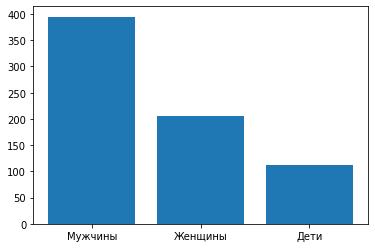

In [ ]:
mens = df[(df.Sex == "male") & (df.Age >= 18)]
womens = df[(df.Sex == "female") & (df.Age >= 18)]
childrens = df[df.Age < 18]

plt.bar(["Мужчины", "Женщины", "Дети"], [len(mens), len(womens), len(childrens)])
